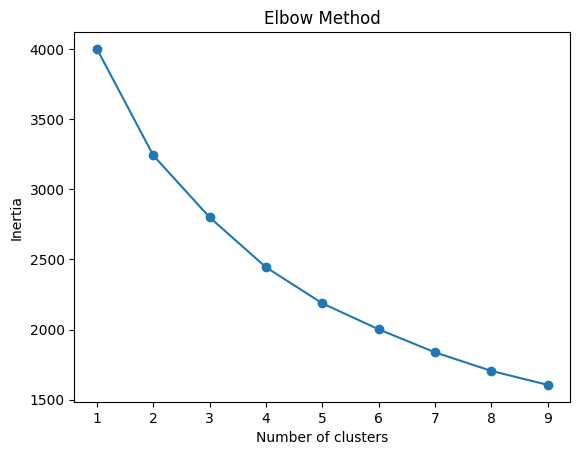

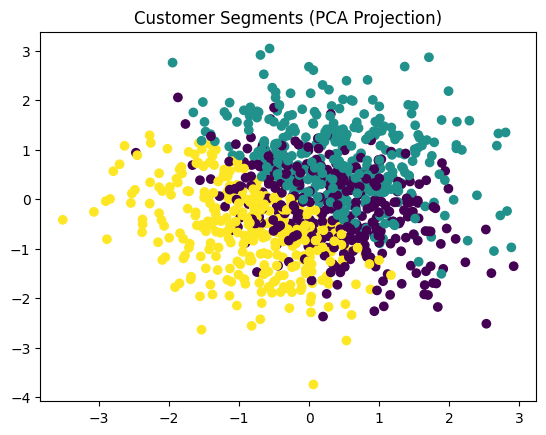

               Age        Income      Balance  Transactions
Segment                                                    
0        57.565868  49897.152155  2040.545386     26.997006
1        44.068862  51336.691258  1446.022803     34.976048
2        29.207831  47850.436704  2287.266755     27.545181


In [1]:
# Customer Segmentation - KMeans Clustering

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset OR generate synthetic if missing
try:
    df = pd.read_csv("bank.csv")  # Kaggle Bank Marketing dataset
    # Example: keep numerical features
    X = df.select_dtypes(include=np.number)
except:
    rng = np.random.default_rng(42)
    df = pd.DataFrame({
        "Age": rng.integers(18,70,1000),
        "Income": rng.normal(50000,15000,1000).clip(10000,100000),
        "Balance": rng.normal(2000,1000,1000).clip(0,10000),
        "Transactions": rng.poisson(30,1000)
    })
    X=df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertia=[]
K=range(1,10)
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K,inertia,"-o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Fit final model (k=3)
kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)
labels=kmeans.fit_predict(X_scaled)

# PCA for visualization
pca=PCA(2)
X_pca=pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels,cmap="viridis")
plt.title("Customer Segments (PCA Projection)")
plt.show()

df["Segment"]=labels
print(df.groupby("Segment").mean())
